## Universidad Nacional de Colombia
# Minería de Datos
**Prof. Elizabeth León**

**Resumen**

Este tutorial presenta varios ejemplos para exploracion y visualización de datos para el conjunto de Datos IRIS tanto en python como en R. Se usan librerias como Pandas y matplotlib disponibles en Python.


---



 # 1. Carga de datos y modulos

In [1]:
import pandas as pd
import numpy as np
import statistics
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
df = pd.read_csv('Ventas_cleaned.csv')

## 1.1. Estadisticas de resumen

In [6]:
df.describe()

,IsDeleted,LastActivityDate,LastViewedDate,LastReferencedDate,F_Descuento__c,F_Impuesto__c,F_LiquidoFidelizable__c,F_MontoFidelizableUSD__c,F_MontoFidelizable__c,F_MontoNoFidelizables__c,F_MontoTotal__c,Aprobaci_n_LM__c,TER_CodigoSolicitanteSapLiq__c,Ter_Calificacion__c,Ter_CantidadTotal__c,TER_Valor_Pagar_redencion__c,TER_HoraVenta__c,TER_Suma_Cantidad_Item__c,TER_Venta_1_galon__c,Ter_VentaMenos1GProcesada__c
count,500000.0,0.0,0.0,0.0,500000.000000,500000.000000,492943.000000,6957.000000,6957.000000,6957.000000,5.000000e+05,6.700000e+02,7.510000e+02,500000.000000,500000.000000,0.0,500000.000000,500000.000000,500000.000000,500000.0
mean,0.0,NaN,NaN,NaN,5.919842,33.022816,9.249366,4.498203,16917.926743,0.004549,6.559257e+04,2.028977e+12,9.380441e+06,0.002672,1.037794,NaN,13.534162,9.609090,0.010604,0.0
std,0.0,NaN,NaN,NaN,247.321598,405.107458,15.940391,5.729493,19426.136927,0.268365,1.406207e+05,3.121127e+03,2.843964e+06,0.051622,0.483998,NaN,6.642147,16.396924,0.102428,0.0
min,0.0,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,9.000000e+00,2.028977e+12,2.029000e+03,0.000000,1.000000,NaN,0.000000,0.000000,0.000000,0.0
25%,0.0,NaN,NaN,NaN,0.000000,0.000000,4.000000,1.000000,6200.000000,0.000000,1.069800e+04,2.028977e+12,1.003783e+07,0.000000,1.000000,NaN,10.000000,4.070000,0.000000,0.0
50%,0.0,NaN,NaN,NaN,0.000000,0.000000,6.000000,3.000000,11400.000000,0.000000,2.638850e+04,2.028977e+12,1.023415e+07,0.000000,1.000000,NaN,15.000000,6.171000,0.000000,0.0
75%,0.0,NaN,NaN,NaN,0.000000,0.000000,9.000000,5.000000,20200.000000,0.000000,6.570000e+04,2.028977e+12,1.040674e+07,0.000000,1.000000,NaN,19.000000,9.155000,0.000000,0.0
max,0.0,NaN,NaN,NaN,26675.000000,45087.000000,280.000000,147.000000,500000.000000,16.180000,7.506078e+06,2.028977e+12,1.040674e+07,1.000000,39.000000,NaN,23.000000,1522.541000,1.000000,0.0


In [7]:
def aad(x):
    a = np.mean(np.absolute(x - statistics.median(x))) 
    return a

In [8]:
aad(df['F_MontoTotal__c'])

53298.53102054001

In [9]:
df.groupby('Segmento_EDS__c').size()

Segmento_EDS__c
COINVERSIÓN            1334
EDS FRANQUICIADAS      2710
EDS OPESE             68636
EDS PROPIAS (POD)      1992
EDS Propia (POT)       3231
EDS TERCEROS           2560
EDS_Competencia       25578
EDS_Franquiciadas    179502
EDS_Propia_POT          720
EDS_Terceros         179254
PROPIA                24790
TDC                    6967
dtype: int64

In [10]:
df['Nombre_PDV__c'].value_counts()[:10]

EDS BETANIA                                          4404
ESTACION DE SERVICIO EL JARDIN                       3973
EDS LA 25 - GNV                                      3575
EDS TERPEL BOSTON (N                                 3522
EDS CONEJERA (SAB)                                   3257
EDS AV BOYACA (SAB)                                  3119
EDS AUTOPISTA LIQUIDOS                               3063
EDS LAS VEGAS (SAB)                                  2983
ESTACION DE SERVICIO  TERPEL FONTIBON FERROCARRIL    2792
EDS PUERTA DE ORO                                    2729
Name: Nombre_PDV__c, dtype: int64

In [11]:
df['Regional_PDV__c'].value_counts()

Sabana         125209
Norte          106129
Occidente       92268
Centro          51786
Antioquia       40201
Bucaramanga     38878
Sur             37365
SABANA           1548
OCCIDENTE        1246
SUR               704
NORTE             670
BUCARAMANGA       248
ANTIOQUIA         237
CENTRO            114
Name: Regional_PDV__c, dtype: int64

In [12]:
df['F_TipoCombustible__c'].value_counts()

Corriente    226805
GNV          184525
Diesel        71830
Extra          9873
Name: F_TipoCombustible__c, dtype: int64

## 1.2. Estadisticas Multivariadas

In [14]:
df[["F_MontoTotal__c", "F_Descuento__c", "F_Impuesto__c", "F_LiquidoFidelizable__c", "Ter_Calificacion__c", "Ter_CantidadTotal__c"]].cov()

,F_MontoTotal__c,F_Descuento__c,F_Impuesto__c,F_LiquidoFidelizable__c,Ter_Calificacion__c,Ter_CantidadTotal__c
F_MontoTotal__c,1.977417e+10,1.390770e+06,-982409.496686,2.162004e+06,60.631022,-1337.809162
F_Descuento__c,1.390770e+06,6.116797e+04,1373.433107,2.283616e+02,-0.007342,1.930595
F_Impuesto__c,-9.824095e+05,1.373433e+03,164112.052557,0.000000e+00,0.008639,163.080600
F_LiquidoFidelizable__c,2.162004e+06,2.283616e+02,0.000000,2.540961e+02,0.000819,0.000000
Ter_Calificacion__c,6.063102e+01,-7.341833e-03,0.008639,8.192342e-04,0.002665,0.000005
Ter_CantidadTotal__c,-1.337809e+03,1.930595e+00,163.080600,0.000000e+00,0.000005,0.234254


In [15]:
df[["F_MontoTotal__c", "F_Descuento__c", "F_Impuesto__c", "F_LiquidoFidelizable__c", "Ter_Calificacion__c", "Ter_CantidadTotal__c"]].corr().round(2)

,F_MontoTotal__c,F_Descuento__c,F_Impuesto__c,F_LiquidoFidelizable__c,Ter_Calificacion__c,Ter_CantidadTotal__c
F_MontoTotal__c,1.00,0.04,-0.02,0.96,0.01,-0.02
F_Descuento__c,0.04,1.00,0.01,0.06,-0.00,0.02
F_Impuesto__c,-0.02,0.01,1.00,NaN,0.00,0.83
F_LiquidoFidelizable__c,0.96,0.06,NaN,1.00,0.00,NaN
Ter_Calificacion__c,0.01,-0.00,0.00,0.00,1.00,0.00
Ter_CantidadTotal__c,-0.02,0.02,0.83,NaN,0.00,1.00


/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


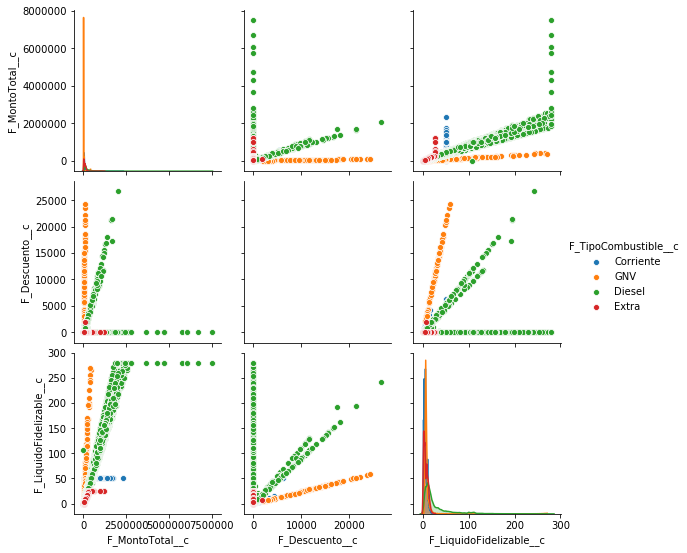

In [16]:
g = sns.pairplot(df[['F_TipoCombustible__c',"F_MontoTotal__c", "F_Descuento__c", "F_LiquidoFidelizable__c"]], hue='F_TipoCombustible__c')

F_MontoTotal__c    AxesSubplot(0.1,0.15;0.8x0.75)
dtype: object

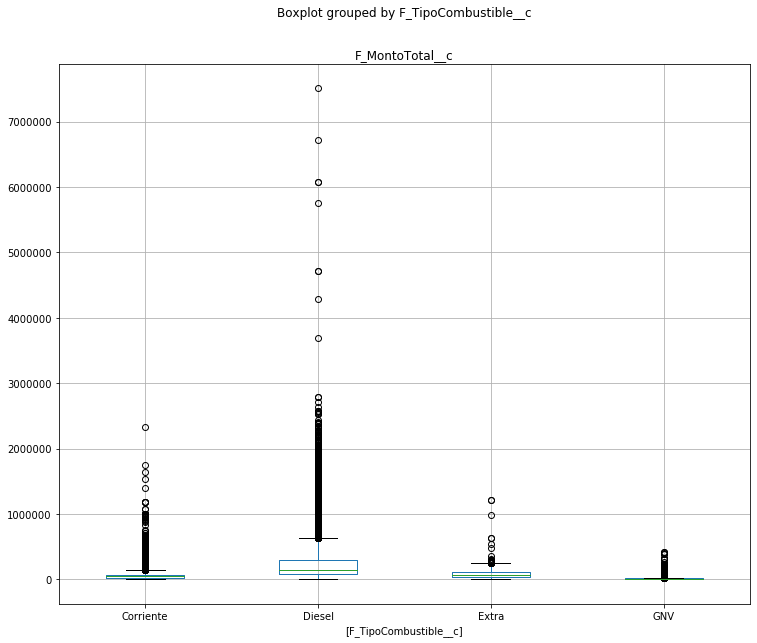

In [17]:
fig, axes = plt.subplots(ncols=1, nrows=1, figsize=(12, 10))
df[['F_TipoCombustible__c',"F_MontoTotal__c"]].boxplot(by='F_TipoCombustible__c', return_type='axes', ax=axes)

TER_Suma_Cantidad_Item__c    AxesSubplot(0.1,0.15;0.8x0.75)
dtype: object

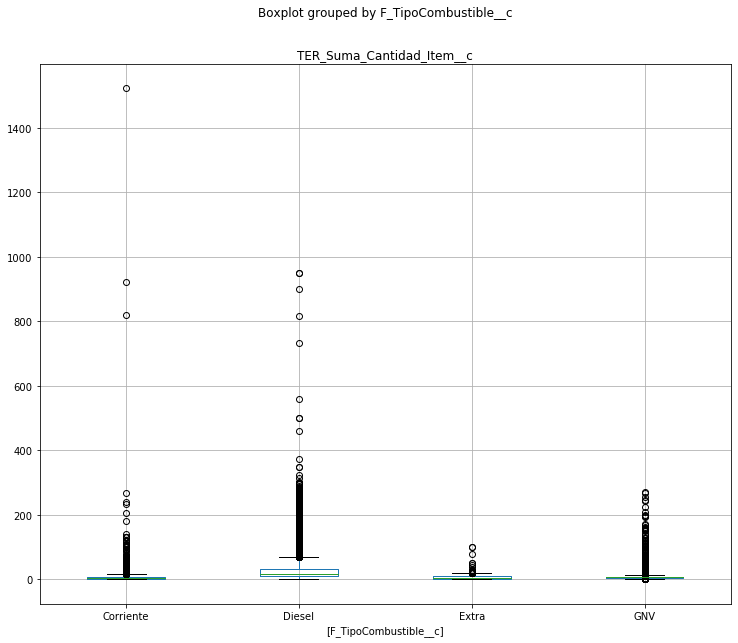

In [18]:
fig, axes = plt.subplots(ncols=1, nrows=1, figsize=(12, 10))
df[['F_TipoCombustible__c',"TER_Suma_Cantidad_Item__c"]].boxplot(by='F_TipoCombustible__c', return_type='axes', ax=axes)

F_Descuento__c    AxesSubplot(0.1,0.15;0.8x0.75)
dtype: object

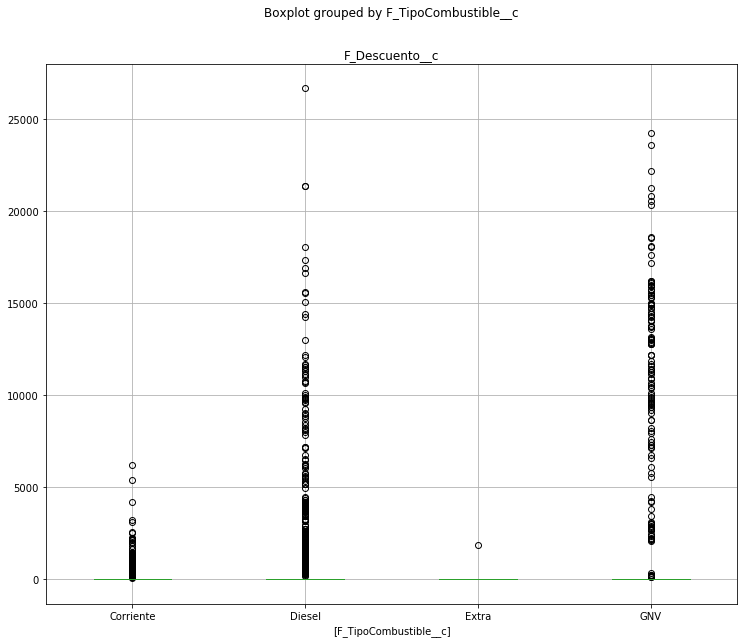

In [19]:
fig, axes = plt.subplots(ncols=1, nrows=1, figsize=(12, 10))
df[['F_TipoCombustible__c',"F_Descuento__c"]].boxplot(by='F_TipoCombustible__c', return_type='axes', ax=axes)

(array([4.99102e+05, 7.28000e+02, 1.29000e+02, 2.50000e+01, 8.00000e+00,
        6.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00, 1.00000e+00]),
 array([    0. ,  4508.7,  9017.4, 13526.1, 18034.8, 22543.5, 27052.2,
        31560.9, 36069.6, 40578.3, 45087. ]),
 <a list of 10 Patch objects>)

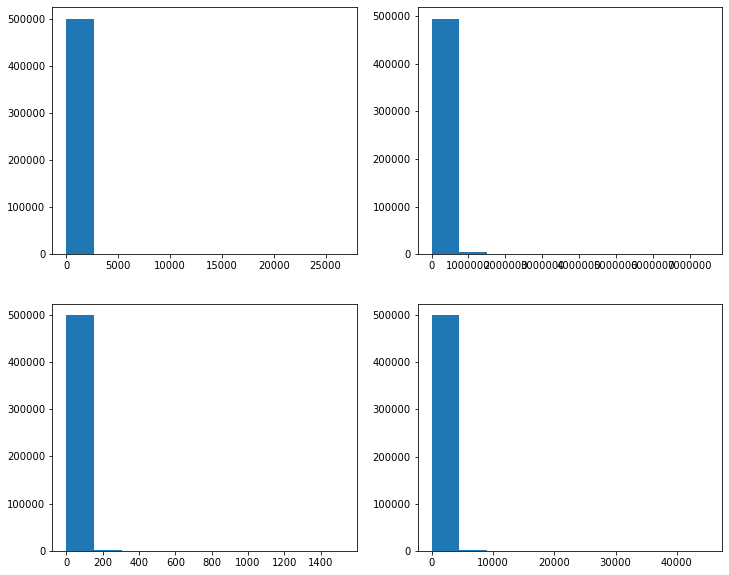

In [39]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes[0,0].hist(df["F_Descuento__c"])
axes[0,1].hist(df["F_MontoTotal__c"])
axes[1,0].hist(df["TER_Suma_Cantidad_Item__c"])
axes[1,1].hist(df["F_Impuesto__c"])